In [1]:
import pandas as pd
import numpy as np


In [2]:
train_data=pd.read_csv('traintaxi.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [4]:
train_data

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0
209671,491.0,2.16,1.0,56.25,0,13.500,69.750,0


In [5]:
train_data.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [7]:
train_data.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [9]:
import matplotlib.pyplot as plt

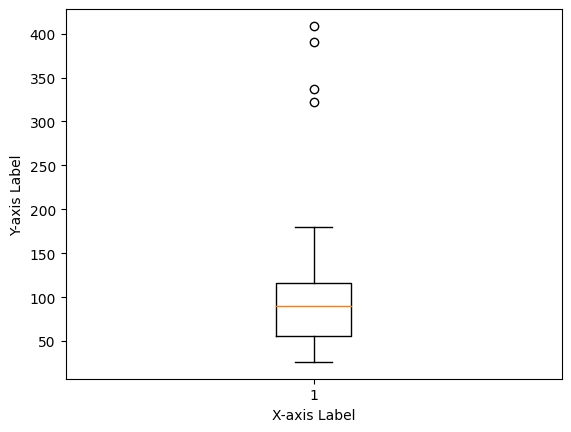

In [11]:
data=train_data['fare']
plt.boxplot(data[:50])
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

In [13]:
X= train_data[['distance_traveled','num_of_passengers']]
y=train_data['fare']

In [14]:
X_train, X_test, y_train,y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [15]:
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [16]:
predictions = model.predict(X_test)
predictions

array([99.04548317, 99.0163822 , 99.13697182, ..., 99.03073336,
       99.20852831, 99.02694625])

In [17]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 7477.191135069277


In [18]:
test_data=pd.read_csv('testtaxi.csv')
test_data

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,1076.0,4.18,1.0,0,0,13.500,0,0
1,429.0,1.48,4.0,0,0,13.500,0,0
2,856.0,4.15,1.0,0,24,6.000,0,0
3,622.0,3.22,1.0,0,15,5.625,0,0
4,507.0,3.98,1.0,0,0,2.250,0,0
...,...,...,...,...,...,...,...,...
89856,435.0,2.24,1.0,0,13,13.700,0,0
89857,519.0,2.61,1.0,0,7,13.850,0,0
89858,450.0,2.24,1.0,0,0,26.625,0,1
89859,919.0,4.12,1.0,0,25,30.200,0,1


In [19]:
test_data['predicted_fare'] = model.predict(test_data[['distance_traveled', 'num_of_passengers']])


test_data['fare'] = test_data['predicted_fare']

In [20]:
test_data.drop('predicted_fare', axis=1, inplace=True)
test_data['total_fare'] = test_data['tip'] + test_data['miscellaneous_fees'] + test_data['fare']
test_data

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,1076.0,4.18,1.0,99.086543,0,13.500,112.586543,0
1,429.0,1.48,4.0,103.018074,0,13.500,116.518074,0
2,856.0,4.15,1.0,99.085945,24,6.000,129.085945,0
3,622.0,3.22,1.0,99.067409,15,5.625,119.692409,0
4,507.0,3.98,1.0,99.082557,0,2.250,101.332557,0
...,...,...,...,...,...,...,...,...
89856,435.0,2.24,1.0,99.047875,13,13.700,125.747875,0
89857,519.0,2.61,1.0,99.055250,7,13.850,119.905250,0
89858,450.0,2.24,1.0,99.047875,0,26.625,125.672875,1
89859,919.0,4.12,1.0,99.085348,25,30.200,154.285348,1


In [21]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 50.83768079815929


In [22]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 7477.191135069277


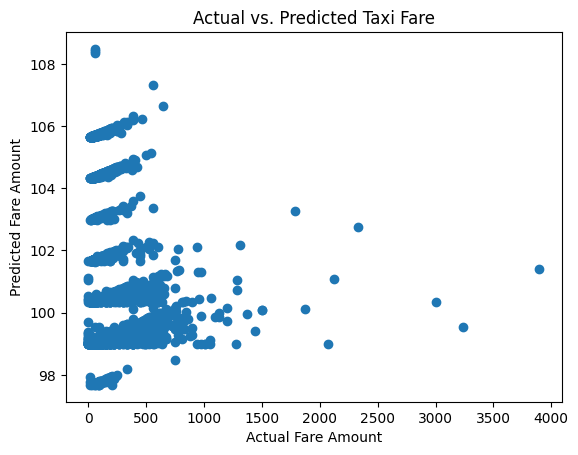

In [23]:
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions)
plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount")
plt.title("Actual vs. Predicted Taxi Fare")
plt.show()

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
predictions = rf_model.predict(X_test)
predictions

array([ 56.61326241,  41.94269221, 131.63045457, ...,  46.67462639,
       179.26742371,  42.42408518])